Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
9
94
94
8836
Epoch 1/15
500/500 [==============================] - 4s 8ms/step - loss: 1.7204 - acc: 0.4360
Epoch 2/15
500/500 [==============================] - 2s 5ms/step - loss: 0.9600 - acc: 0.7720
Epoch 3/15
500/500 [==============================] - 2s 5ms/step - loss: 0.5900 - acc: 0.8940
Epoch 4/15
500/500 [==============================] - 2s 5ms/step - loss: 0.3799 - acc: 0.9240
Epoch 5/15
500/500 [==============================] - 3s 5ms/step - loss: 0.2362 - acc: 0.9660
Epoch 6/15
500/500 [==============================] - 2s 5ms/step - loss: 0.1600 - acc: 0.9860
Epoch 7/15
500/500 [==============================] - 2s 5ms/step - loss: 0.1132 - acc: 0.9920
Epoch 8/15
500/500 [==============================] - 3s 5ms/step - loss: 0.0794 - acc: 0.9940
Epoch 9/15
500/500 [==============================] - 2s 5ms/step - loss: 0.0613 - acc: 0.9960
E

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:177: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


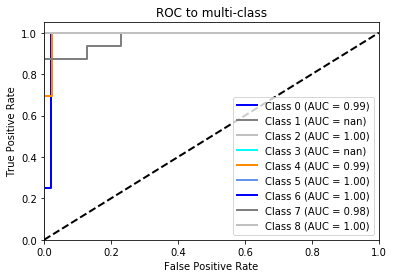

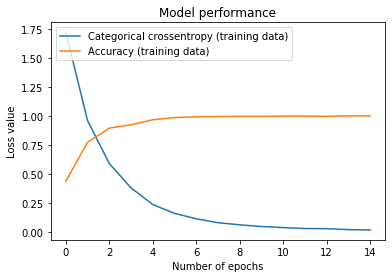

In [0]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.metrics import classification_report
from keras import optimizers


import numpy as np
import matplotlib.pyplot as plt
import csv

from os.path import join

ROOT = '/content/drive/'
PROJ = 'My Drive/Colab Notebooks/' # You need to change this parameter according to your real path.
DATA = 'My Drive/Colab Notebooks/bigram/Round1/' # You need to change this parameter according to your real path.

LEARNING_RATE = 0.001
EPOCHS = 15
MINI_BATCH = 20
FLATTEN_NODES = 64


PROJECT_PATH = join(ROOT, PROJ)
DATA_PATH = join(ROOT, DATA)

#First: mount the drive to access files 
from google.colab import drive
drive.mount(ROOT,force_remount=False)

from importlib.machinery import SourceFileLoader
data_helpers = SourceFileLoader('data_helpers', join(PROJECT_PATH, 'data_helpers_2.py')).load_module()

'''
Reading the dataset
'''
train_file = join(DATA_PATH,'train.csv')
test_file = join(DATA_PATH,'test.csv')

train_images, train_labels, test_images, test_labels, labels_count = data_helpers.load_training_and_testing_data(train_file,test_file)

image_size = train_images.shape[1]
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint32)
print(image_width)
print(image_height)
print(image_size)

train_images = train_images.reshape(-1, image_width, image_height, 1)

test_images = test_images.reshape(-1, image_width , image_height, 1)

model = Sequential()

model.add(Conv2D(16, (3,3), input_shape=(image_height, image_width, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(FLATTEN_NODES))
model.add(Activation('relu'))

model.add(Dense(labels_count))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


history = model.fit(train_images, train_labels, batch_size=MINI_BATCH, epochs=EPOCHS) #validation_split=0.1, 


test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('Test loss', test_loss)
print('Test accuracy', test_acc)

y_pred  = model.predict(test_images, batch_size=64, verbose=1)
size = y_pred.shape[0]



#==================================Display precision/recall================================
print(classification_report( np.argmax(test_labels, axis=1), np.argmax(y_pred, axis=1)))
